### Data Importing and Pre-Processing

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns

In [48]:
# dataframe

df = pd.read_csv("House_Price.csv", header=0)

In [49]:
# view the data

df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [50]:
# number of rows & number of cloumns

df.shape

(506, 19)

### EDD & Univariate Analysis

In [51]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


- In EDD we should look at count variable and mean & median.

- count is almost 500 for all the variables except n_hos_beds. n_hos_beds has 8 missing values.

- There is significant difference in the mean and median value of crime_rate. Also, There is large difference between 75% and     Max value of crime_rate. 

- Same case can be found for n_hot_rooms, rainfall variable.
- This means our data for these variables are negatively skewed or there are some outliers in our data.

- EDD used to identifiy such variables. 

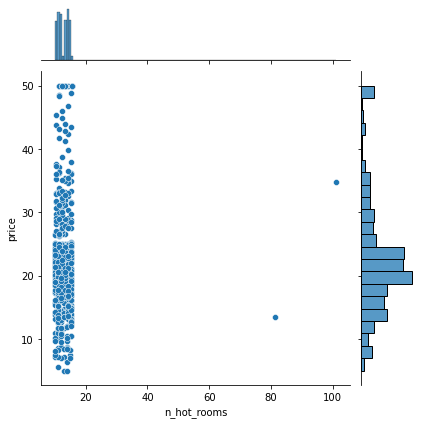

In [52]:
# scatterplot for price & n_hot_room to identify data properly

sns.jointplot(x='n_hot_rooms', y='price', data=df);

- on the top we have histogram for n_hot_rooms and and right we have histogra of price.

- In the center we have the scatterplot for price vs n_hot_rooms.

- There are two outliers in the graph which are at very large distance from others.

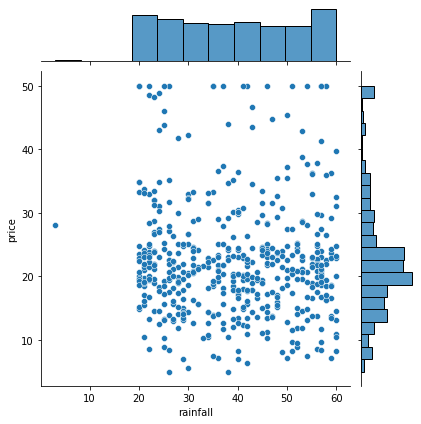

In [53]:
# scatterplot for price & rainfall to identify data properly

sns.jointplot(x='rainfall', y='price', data=df);

- on the top we have histogram for rainfall and and right we have histogra of price.

- In the center we have the scatterplot for price vs rainfall.

- here we can see most of the values for rainfall are in between 20 to 60, but there is one outlier.

- This may be due to some sampling error or calculation error.

- This identification are for numerical variables only.

In [54]:
# now, identifying categorical variables

df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


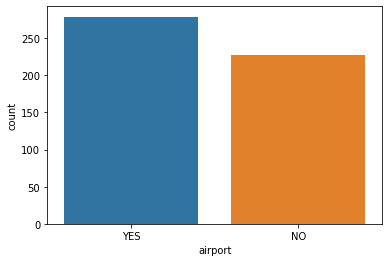

In [55]:
# lets analyse "airport" variable.

sns.countplot(x='airport', data=df);

- here, nothing unusal for this data, so let's move on waterbody variable.

sns.countplot(x='waterbody', data=df)

- we can see distribution of waterbodies, but here also there is nothing unusal about this variable also. so, let's move on bus_ter variable.

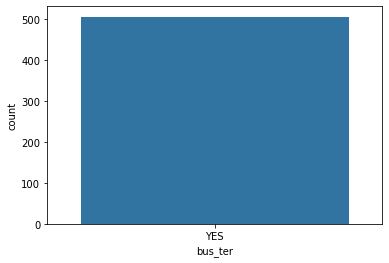

In [56]:
sns.countplot(x='bus_ter', data=df);

- here, we can see our bus terminal is providing only one value which is "YES". So, this may or may not be useful in our data. SInce this will not provide any difference. So this won't impact our model in anyway.

#### Observation from EDD

1. Missing values in n_hos_beds.

2. Skewness or outliers in variable crime_rate.

3. Outliers in n_hot_rooms and rainfall.

4. Bus Terminal variable is only taking one value.

### Indentify and Treat Outliers

In [57]:
# info function gives us number of counts and the datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

- lets identify crime_rate, n_hot_rooms and rainfall.

- since we know that n_hot_rooms and rainfall contains outliers by scatterplot, we will right function directly.

- we will use capping and flooring method.

In [58]:
# first we need to identify 99th and 1st percentile value of these two variable.
# we will use percentile function of numpy.

# Treating outliers for  n_hot_rooms.

np.percentile(df.n_hot_rooms,[99])

array([15.39952])

In [59]:
# upper limit
uv = np.percentile(df.n_hot_rooms, [99])[0]
print(uv)

15.399519999999999


In [60]:
# now lets identify the rows where value is larger than upper limit
df[(df.n_hot_rooms > uv)]

# below table shows replaced values with repaired values.

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


- now we can see all the values of n_hot_rooms in above output is larger than upperlimit.
- now lets cap these values.
- we will use 3 number to multiply since we only want to remove values which are significantly larger than 15.399..
- in our case these values are 101.12 and 81.12.

In [61]:
df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3 * uv

# above output of table shows replaced values

<ipython-input-61-fc94dab6301c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3 * uv


In [62]:
# now lets treat the outliers of rainfall. 
# lower limit
lv = np.percentile(df.rainfall, [1])[0]
print(lv)

20.0


In [63]:
df[(df.rainfall < lv)]

# below table shows replaced values with repaired values.

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


- we are only getting one single value where rainfall in less than lower value.

In [64]:
# we will use 0.3 to multiply with outliers.

df.rainfall[(df.rainfall < 0.3 * lv)] = 0.3 * lv

# above output of table shows replaced values

<ipython-input-64-ff878a8d94b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall < 0.3 * lv)] = 0.3 * lv


- now let's look at crime_rate variable.

- since we don't know whether crime_rate contains outliers or the distribution is skewed, we will first use jointplot of crime_rate vs dependant variables.

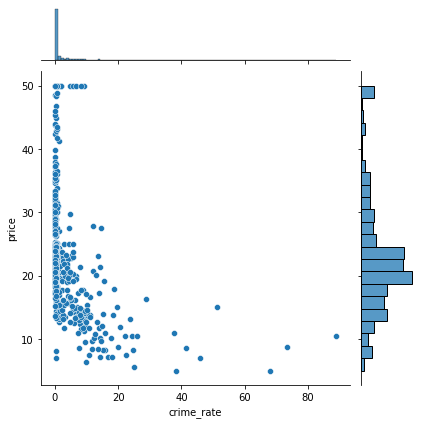

In [65]:
sns.jointplot(x='crime_rate', y='price', data=df);

- as you can see the histrogram of crime_rate there is large consantration of values at lower respect row of crime_rate, but as we move at higher value of crime_rate the density of distribution reduces.

- and if you see relationship with price
    - for low crime_rate the price is high and for high crime_rate price is decresing.
    - this is polynomial relationship between these two variables.
    - we need to make it linear
    
-  we will first transport our variable crime_rate and than we will look out for outliers.

In [66]:
# Let's take a look at our EDD again

df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711


- as you can see for n_hot_rooms, now max value is 46 and mean and median are alot better than before.
- similarly for rainfall the lower value is 6 and mean and median are closer than before.

### Missing Values Imputation

In [67]:
# get info about missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

- here we can see all the variables have values 506 except n_hos_beds, This confirms that n_hos_beds confirm missing values.

In [68]:
# let's impute missing values
# we will use "fillna" function and we will replace missing values by mean of the variable.

df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean)

In [69]:
# now you can see count is 506 instead of 498

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    object 
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [70]:
# if we want to do missing value imputation for all of the columns

# df = df.fillna(df.mean)

### Variable Transformation

- We have already corrected the missing values and also removed the outliers from the variables.

- Now, Let's correct crime_rate variable.

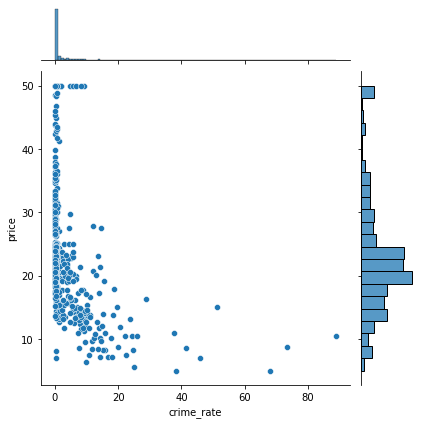

In [71]:
# scatter-plot of crime_rate vs price

sns.jointplot(x='crime_rate', y='price', data=df);

- from the plot, relation seems to look like logarithmic curve and we need to transform it to have linear relationship between x and y.
- One way is take log of x (crime_rate).

- Since most of the values are near 0 and log(0) is not defined that stats minus infinity.

- so to remove this we will add value of one to our crime_rate.

In [72]:
# log(0) = minus infinity
# log(1) = zero

df.crime_rate = np.log(1 + df.crime_rate)

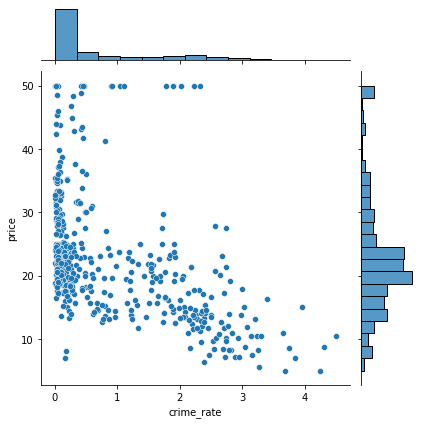

In [73]:
# PLotting after transformation

sns.jointplot(x='crime_rate', y='price', data=df);

- Now relationship looking more linear than before.
- One more thing is that there are no visible outliers in the plot.
----

- we have four variables for distance in our datasets and all these are conveying the same information.

- So let's just create a average variable of this for distances to convey the same information in a single variable.

In [74]:
df['avg_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4) / 4

In [75]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,46.198560,60.000000,0.086711,12.127500


In [76]:
# we will use avg_dist and remove other four

del df['dist1']

In [77]:
del df['dist2']

In [78]:
del df['dist3']

In [79]:
del df['dist4']

In [80]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,46.198560,60.000000,0.086711,12.127500


In [81]:
# we will also delete bus_ter variable as it will not providing important information
del df['bus_ter']

In [82]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.48,11.19200,River,23,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,0.039474,6.0625


### Dummy Variable Creation

- We need to change non-numerical (categorical) values into numerical values.
- we will do that by creating dummy variables.

In [83]:
# creating dummy variables with pandas
df = pd.get_dummies(df, columns=['airport', 'waterbody'])

In [84]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.48,11.19200,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0,0


- we will remove one of from airport_NO or airport_yes as they both conveying similar information.
- Also we will remove waterbody_none variable as if out of river and lake, if city does not have anything it will put 1 to none variable so we will also remove that variable also.

In [85]:
del df['airport_NO']

In [86]:
del df['waterbody_None']

In [87]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.48,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


### Correlation Matrix

In [88]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.017007,-0.047200,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,0.056570,0.082151,0.638951,-0.586371,-0.134486,-0.025390,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,-0.003761,0.055845,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,0.007238,0.091956,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.014583,-0.064718,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,0.013918,0.074684,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.037007,-0.045928,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,0.017036,0.061444,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hot_rooms,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,1.000000,0.014869,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096
rainfall,-0.047200,0.082151,0.055845,0.091956,-0.064718,0.074684,-0.045928,0.061444,0.014869,1.000000,0.078278,-0.037285,-0.013171,-0.016170,0.109234,-0.037016


#### from matrix we can identify below things

- price vs room_num has very high correlation coefficiant and so that it will be very important in our analysis.
- price vs poor_prop highly negatively correlated and so that it will be very important in our analysis.
----
- price vs n_hot_rooms has very low correlation coefficiant and so that it will not be very important.
- price vs rainfall has very low correlation coefficiant and so that it will not be very important.
- price vs waterbody_river has very low correlation coefficiant and so that it will not be very important.
----
- The correlation between air quality and parks is zero point nine one.
- This means that these two independent variables are highly correlated, And if we take both of these variables for our analysis, this may lead to multicolinearity.
- So we have to delete one of these two variables.
- There are multiple ways to select which very way to delete.
- First one is to check the correlation of these two variables with our dependent variable.
- EX: parks vs price and air_qual vs price. These has high negative correlationship.
- we will take that variable which has higher correlation than other. In our case that is air_qual.
- so we will remove parks from our dataset

In [89]:
del df['parks']

In [90]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.48,11.19200,23,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


### SImple Linear Regression

In [92]:
# importing library

import statsmodels.api as sn

- By default "statsmodels" does not include beta-note term [constant]

- ```
y = beta0 + beta1*X
```

In [96]:
# adding constant
# creating variable x
X = sn.add_constant(df["room_num"])

In [97]:
# model object
# creating object of Ordinary Least Square
# argument "OLS(Y variable, X variable)"
lm = sn.OLS(df['price'], X).fit()

In [98]:
# getting summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           1.31e-74
Time:                        15:45:44   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Here, room_num = 9.0997 is our "beta1" and const = -34.6592 is our "beta0".
- We can also see standard error, t value corresponding to each beta0 and beta1.
- P value should be less than 1% or 5% to have significant relationship between x and y variable and our P value is 0.
- We can also see the value of R-Squared and Adjusted R-Squared. Both the values should be greater than 0.5. Here, both the values are nearly 0.5 and this is pretty good considering that we are running Simple Linear Regression or One Variable Linear Regression.

#### Other Method for Simple Linear Regression

In [99]:
# importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [100]:
# Defining Y Variable
y = df['price']

In [101]:
# Defining X variable
# x is should be 2D numpy array
X = df[["room_num"]]

In [102]:
# create LR object
lm2 = LinearRegression()

In [103]:
lm2.fit(X, y)

LinearRegression()

In [104]:
# view intercept and coefficient
print(lm2.intercept_, lm2.coef_)

-34.65924312309721 [9.09966966]


- Intercept is -34.6592 which is our "beta1" and "coef of x" is 9.099 which is our "beta0".

In [105]:
# Documentation of LinearRegression
help(lm2)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean

In [106]:
# Predicting valus of y dpending on Linear model
lm2.predict(X)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

In [108]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : vectors or keys in ``data``
        Variables that specify positions on the x and y axes.
    data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
        Input data structure. Either a long-form collection of vectors that can be
        assigned to named variables or a wide-form datas

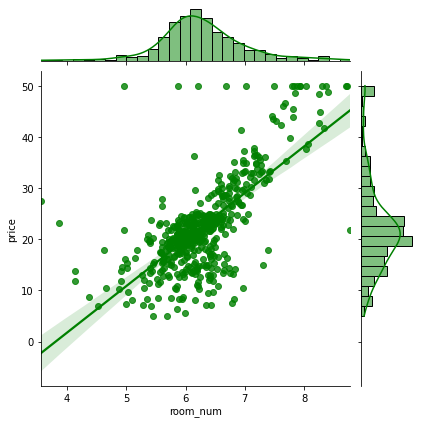

In [116]:
# plotting our Regression Line
# kind = 'reg' stands for Regression
sns.jointplot(x=df['room_num'], y=df['price'], data=df, kind='reg', color='green');

- We have the scatter plot of price vs room_num.
- we can also see Regression Line
- You can notice our "Coef of X [beta0]" is 9.xxx from plot.
- Also, you can see incresing the X value also increase the value of Y.
- If you increase the value of X by 1, the value of Y will incrase by 9 point.
    - EX: If we increase the value of X "5 to 6", the value of Y will increase "10 to 20".